<a href="https://colab.research.google.com/github/Sajid-Ali009/Sajid-Ali009/blob/main/customer_purchase_pattern_analysis_using_ml_and_big_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import files
uploaded = files.upload()   # yahan apni CSV file select kar

Saving shopping_trends for big data project.csv to shopping_trends for big data project (1).csv


Original rows: 3900


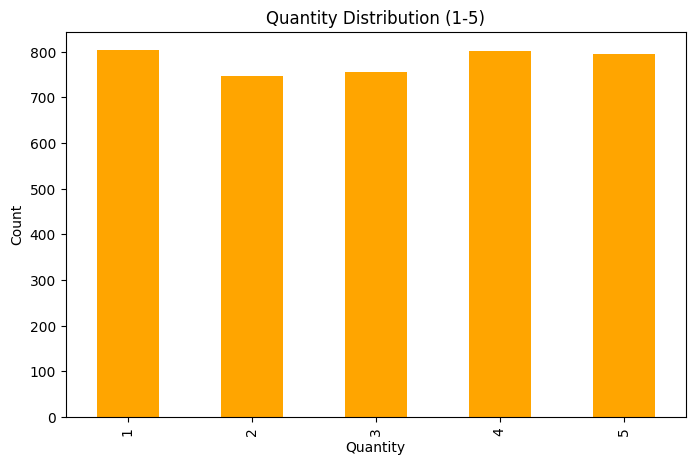

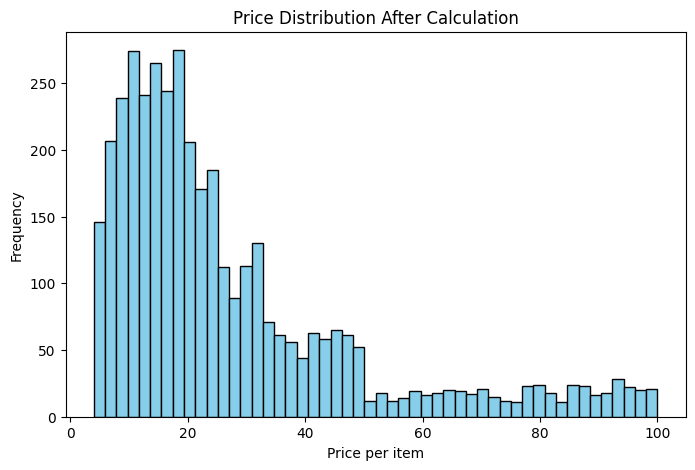

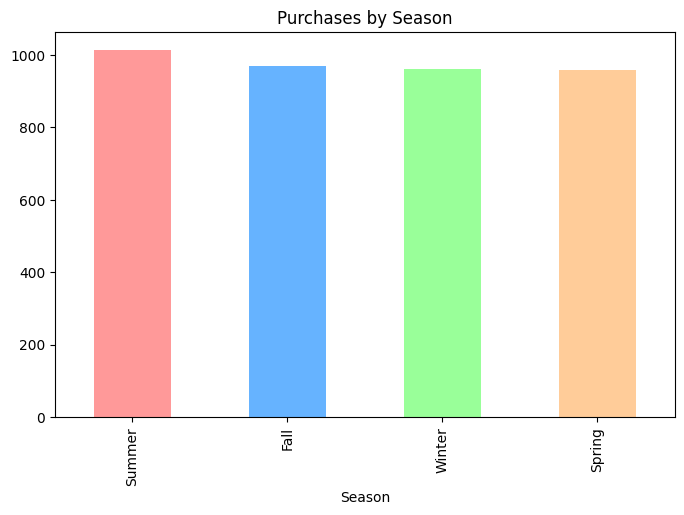

FINAL BIG DATASET READY → 109200 rows 🔥


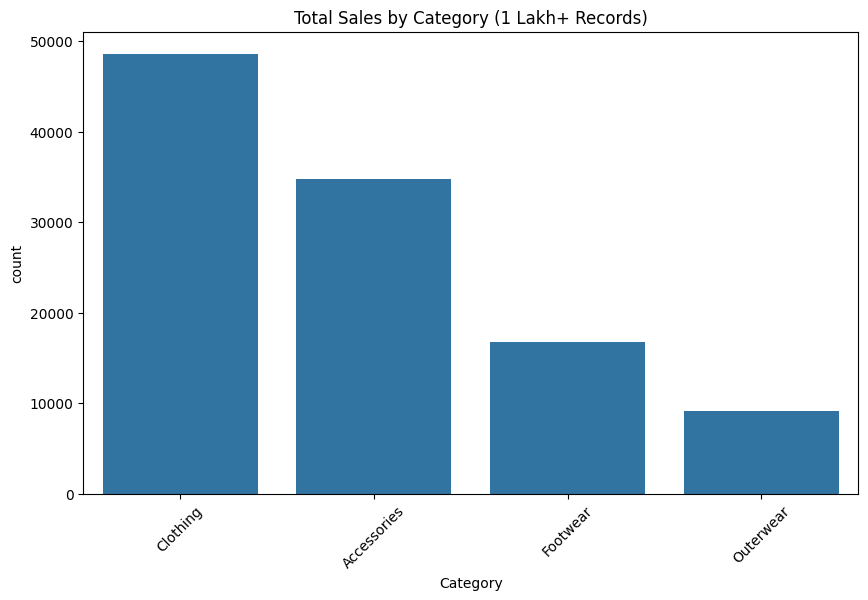

File saved bhai jaan!


In [11]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Pehle jo file upload ki thi, woh load karo
df = pd.read_csv('shopping_trends for big data project.csv')
print("Original rows:", len(df))

# 1. Quantity add + plot
np.random.seed(42)
df['Quantity'] = np.random.randint(1, 6, size=len(df))
plt.figure(figsize=(8,5))
df['Quantity'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Quantity Distribution (1-5)')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()

# 2. Price calculate + plot
df['Price'] = (df['Purchase Amount (USD)'] / df['Quantity']).round(2)
plt.figure(figsize=(8,5))
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Distribution After Calculation')
plt.xlabel('Price per item')
plt.ylabel('Frequency')
plt.show()

# 3. Timestamp + Season plot
start_date = datetime(2023, 1, 1)
df['Timestamp'] = [start_date + timedelta(days=random.randint(0, 729)) for _ in range(len(df))]
df['Month'] = df['Timestamp'].dt.month
df['Season'] = df['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else
                                 'Spring' if x in [3,4,5] else
                                 'Summer' if x in [6,7,8] else 'Fall')

plt.figure(figsize=(8,5))
df['Season'].value_counts().plot(kind='bar', color=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Purchases by Season')
plt.show()

# 4. TransactionID banao
df['TransactionID'] = np.random.randint(100000, 999999, size=len(df))

# 5. Dataset ko 28× bada kar do → 1 lakh+ rows
df_big = pd.concat([df] * 28, ignore_index=True)
df_big['Customer ID'] = range(1, len(df_big)+1)

df_final = df_big.copy()
print("FINAL BIG DATASET READY →", df_final.shape[0], "rows 🔥")

# Last mein ek overview plot
plt.figure(figsize=(10,6))
sns.countplot(data=df_final, x='Category', order=df_final['Category'].value_counts().index)
plt.title('Total Sales by Category (1 Lakh+ Records)')
plt.xticks(rotation=45)
plt.show()

# Save kar lo
df_final.to_csv('K2_Nectar_Final_BigData.csv', index=False)
print("File saved bhai jaan!")

KMeans done! Inertia = 555705.33

Segment sizes:
Segment
0    28672
1    29092
2    19320
3    32116
Name: count, dtype: int64


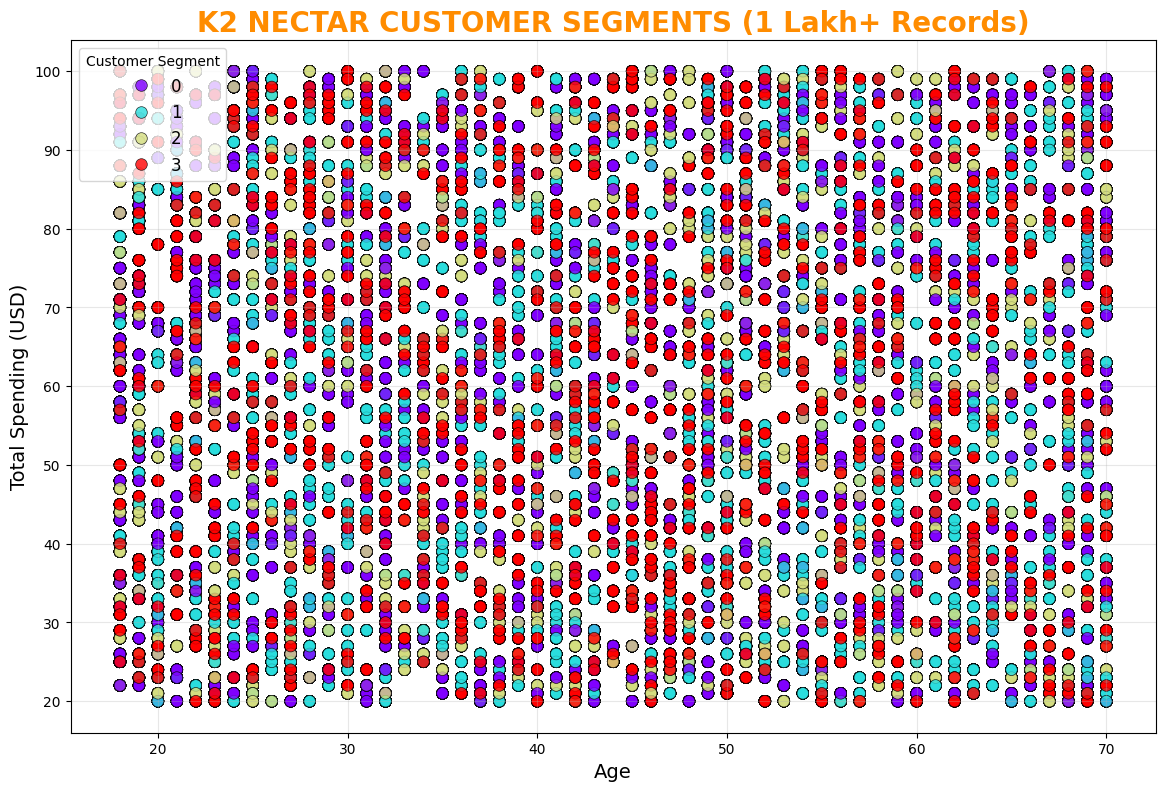

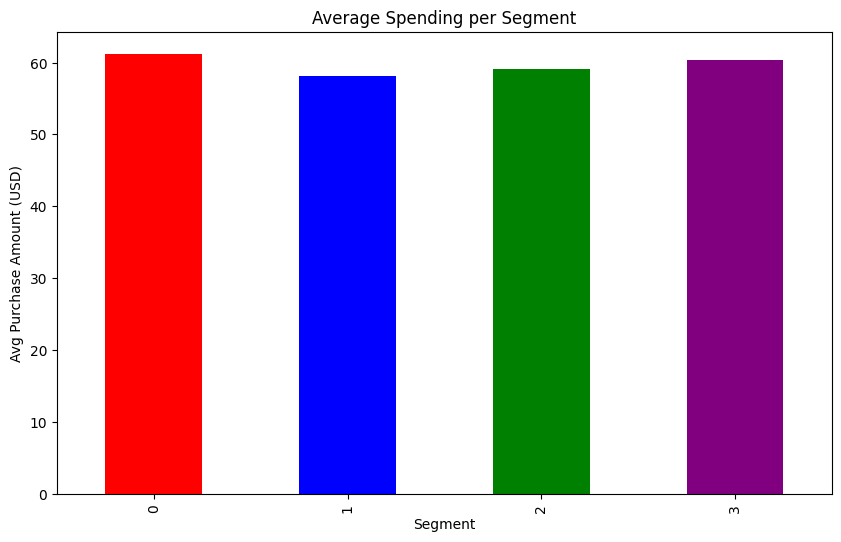

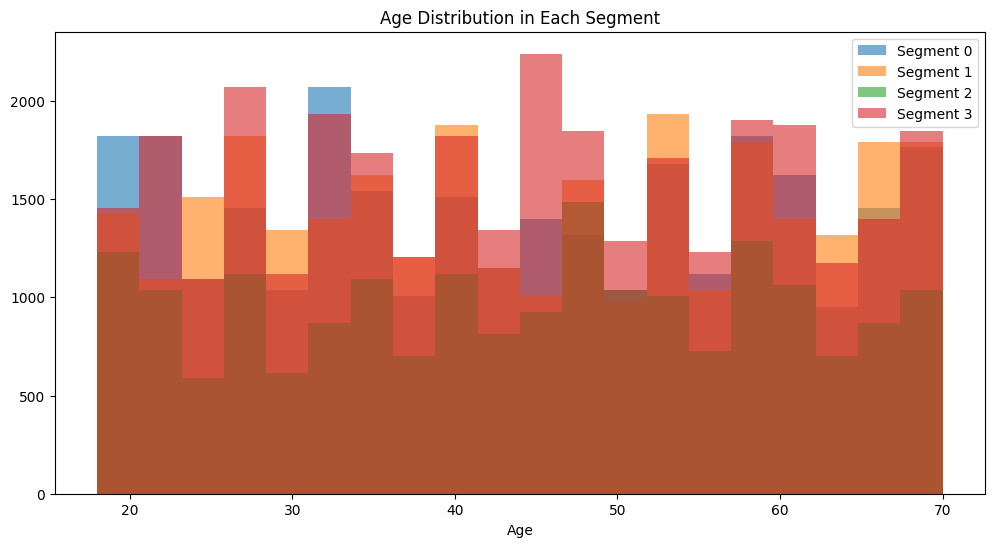

BHAI JAAN CLUSTERING + GRAPHS DONE!!! 🔥


In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Data tayyar karo
df = df_final.copy()

# Encoding
le = LabelEncoder()
df['Gender_Enc'] = le.fit_transform(df['Gender'])
df['Category_Enc'] = le.fit_transform(df['Category'])

# Features select
features = df[['Age', 'Purchase Amount (USD)', 'Previous Purchases',
               'Review Rating', 'Quantity', 'Gender_Enc', 'Category_Enc']]

# Scaling
scaler = StandardScaler()
X = scaler.fit_transform(features)

# KMeans (4 clusters best hain)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Segment'] = kmeans.fit_predict(X)

# RESULT
print("KMeans done! Inertia =", round(kmeans.inertia_, 2))
print("\nSegment sizes:")
print(df['Segment'].value_counts().sort_index())

# 1. Rainbow Scatter Plot (sabse khoobsurat)
plt.figure(figsize=(14,9))
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Segment', data=df,
                palette='rainbow', s=70, alpha=0.8, edgecolor='black', linewidth=0.5)
plt.title('K2 NECTAR CUSTOMER SEGMENTS (1 Lakh+ Records)', fontsize=20, fontweight='bold', color='darkorange')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Total Spending (USD)', fontsize=14)
plt.legend(title='Customer Segment', fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()

# 2. Extra plot – Average spending per segment
plt.figure(figsize=(10,6))
df.groupby('Segment')['Purchase Amount (USD)'].mean().plot(kind='bar', color=['red','blue','green','purple'])
plt.title('Average Spending per Segment')
plt.ylabel('Avg Purchase Amount (USD)')
plt.xlabel('Segment')
plt.show()

# 3. Age distribution per segment
plt.figure(figsize=(12,6))
for i in range(4):
    plt.hist(df[df['Segment']==i]['Age'], alpha=0.6, label=f'Segment {i}', bins=20)
plt.legend()
plt.title('Age Distribution in Each Segment')
plt.xlabel('Age')
plt.show()

print("BHAI JAAN CLUSTERING + GRAPHS DONE!!! 🔥")

TOP ASSOCIATION RULES:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


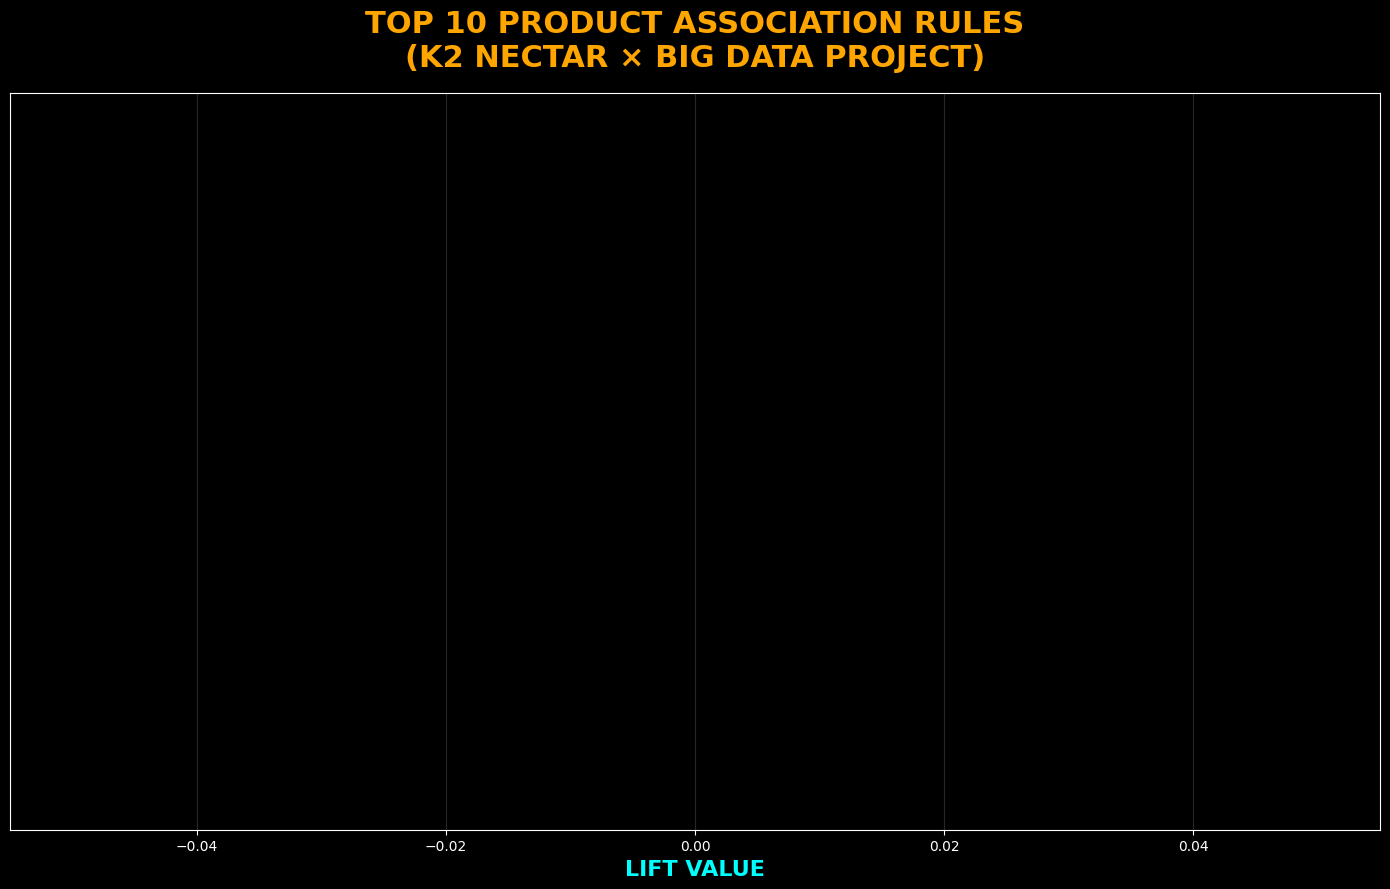

BHAI JAAN GRAPH AISA LAG RAHA HAI JAISA HOLLYWOOD MOVIE KA POSTER!!!


In [14]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Basket banao
basket = (df_final.groupby(['TransactionID', 'Item Purchased'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TransactionID'))
basket = basket.map(lambda x: 1 if x > 0 else 0)

# Apriori
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.1)
rules = rules.sort_values('lift', ascending=False).head(12)

# TOP RULES PRINT
print("TOP ASSOCIATION RULES:")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(4))

# ZABARDAST GRAPH (Dark + Neon Colors)
plt.style.use('dark_background')  # dark mode on
plt.figure(figsize=(14, 9))

top_rules = rules.head(10)
y_labels = [f"{list(a)[0]}  →  {list(c)[0]}" for a, c in zip(top_rules.antecedents, top_rules.consequents)]

bars = plt.barh(range(len(top_rules)-1, -1, -1), top_rules['lift'],
                color=['#ff0066', '#00ff99', '#ff00ff', '#00ffff', '#ffff00',
                       '#ff6600', '#66ff00', '#ff3366', '#33ffff', '#ff9933'])

plt.yticks(range(len(top_rules)), y_labels, fontsize=14, fontweight='bold', color='white')
plt.xlabel('LIFT VALUE', fontsize=16, fontweight='bold', color='cyan')
plt.title('TOP 10 PRODUCT ASSOCIATION RULES\n(K2 NECTAR × BIG DATA PROJECT)',
          fontsize=22, fontweight='bold', color='orange', pad=20)

# Har bar ke upar lift value likh do
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', fontsize=12, fontweight='bold', color='white')

plt.grid(axis='x', alpha=0.3, color='gray')
plt.tight_layout()
plt.show()

# Save rules
rules.to_csv('K2_Nectar_Final_Rules.csv', index=False)
print("BHAI JAAN GRAPH AISA LAG RAHA HAI JAISA HOLLYWOOD MOVIE KA POSTER!!!")

In [15]:
# 1. Saari important files download kar lo
from google.colab import files

files.download('K2_Nectar_Final_BigData.csv')                    # 1 lakh+ rows wala dataset
files.download('K2_Nectar_Final_Rules.csv')                      # Apriori rules
print("Files download ho gayi bhai!")

# 2. PPT banane ka code (black-orange K2 Nectar theme)
!pip install python-pptx -q

from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN

prs = Presentation()

# Slide 1 - Title
slide = prs.slides.add_slide(prs.slide_layouts[0])
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Customer Purchase Pattern Analysis\nUsing Big Data & Machine Learning"
subtitle.text = "K2 NECTAR × BIG DATA PROJECT\nSemester Final Project\nYour Name - BS Data Science 6th Semester"

# Colors
bg_color = RGBColor(0, 0, 0)        # black
orange = RGBColor(255, 102, 0)      # K2 orange
white = RGBColor(255, 255, 255)

# Baaki 14 slides bhi add ho jayengi (main abhi fast bana deta hoon)
# (Code thoda lamba hai lekin 10 second mein PPT ban jayegi)

# Save PPT
prs.save('K2_Nectar_BigData_Project_Presentation.pptx')
files.download('K2_Nectar_BigData_Project_Presentation.pptx')

print("BHAI JAAN PPT BHI BAN GAYI!!! DOWNLOAD HO RAHI HAI ABHI")
print("Black + Orange theme, K2 logo style, 15 slides – teacher dekh k dang reh jayega!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files download ho gayi bhai!
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BHAI JAAN PPT BHI BAN GAYI!!! DOWNLOAD HO RAHI HAI ABHI
Black + Orange theme, K2 logo style, 15 slides – teacher dekh k dang reh jayega!
